In [1]:
import numpy as np
import pandas as pd
import os
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [2]:
data = pd.read_csv("FIFA23_official_data.csv/FIFA23_official_data.csv")

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17660 entries, 0 to 17659
Data columns (total 29 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        17660 non-null  int64  
 1   Name                      17660 non-null  object 
 2   Age                       17660 non-null  int64  
 3   Photo                     17660 non-null  object 
 4   Nationality               17660 non-null  object 
 5   Flag                      17660 non-null  object 
 6   Overall                   17660 non-null  int64  
 7   Potential                 17660 non-null  int64  
 8   Club                      17449 non-null  object 
 9   Club Logo                 17660 non-null  object 
 10  Value                     17660 non-null  object 
 11  Wage                      17660 non-null  object 
 12  Special                   17660 non-null  int64  
 13  Preferred Foot            17660 non-null  object 
 14  Intern

In [4]:
data.head()

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,Real Face,Position,Joined,Loaned From,Contract Valid Until,Height,Weight,Release Clause,Kit Number,Best Overall Rating
0,209658,L. Goretzka,27,https://cdn.sofifa.net/players/209/658/23_60.png,Germany,https://cdn.sofifa.net/flags/de.png,87,88,FC Bayern München,https://cdn.sofifa.net/teams/21/30.png,...,Yes,"<span class=""pos pos28"">SUB","Jul 1, 2018",NaN,2026,189cm,82kg,€157M,8.0,NaN
1,212198,Bruno Fernandes,27,https://cdn.sofifa.net/players/212/198/23_60.png,Portugal,https://cdn.sofifa.net/flags/pt.png,86,87,Manchester United,https://cdn.sofifa.net/teams/11/30.png,...,Yes,"<span class=""pos pos15"">LCM","Jan 30, 2020",NaN,2026,179cm,69kg,€155M,8.0,NaN
2,224334,M. Acuña,30,https://cdn.sofifa.net/players/224/334/23_60.png,Argentina,https://cdn.sofifa.net/flags/ar.png,85,85,Sevilla FC,https://cdn.sofifa.net/teams/481/30.png,...,No,"<span class=""pos pos7"">LB","Sep 14, 2020",NaN,2024,172cm,69kg,€97.7M,19.0,NaN
3,192985,K. De Bruyne,31,https://cdn.sofifa.net/players/192/985/23_60.png,Belgium,https://cdn.sofifa.net/flags/be.png,91,91,Manchester City,https://cdn.sofifa.net/teams/10/30.png,...,Yes,"<span class=""pos pos13"">RCM","Aug 30, 2015",NaN,2025,181cm,70kg,€198.9M,17.0,NaN
4,224232,N. Barella,25,https://cdn.sofifa.net/players/224/232/23_60.png,Italy,https://cdn.sofifa.net/flags/it.png,86,89,Inter,https://cdn.sofifa.net/teams/44/30.png,...,Yes,"<span class=""pos pos13"">RCM","Sep 1, 2020",NaN,2026,172cm,68kg,€154.4M,23.0,NaN


In [5]:
new_data = data[["ID","Name","Age","Nationality","Potential","Overall","Club","Real Face","Height",'Weight','Joined','Best Overall Rating']]

# new_data = data["Name"]


In [6]:
new_data.head()

,ID,Name,Age,Nationality,Potential,Overall,Club,Real Face,Height,Weight,Joined,Best Overall Rating
0,209658,L. Goretzka,27,Germany,88,87,FC Bayern München,Yes,189cm,82kg,"Jul 1, 2018",NaN
1,212198,Bruno Fernandes,27,Portugal,87,86,Manchester United,Yes,179cm,69kg,"Jan 30, 2020",NaN
2,224334,M. Acuña,30,Argentina,85,85,Sevilla FC,No,172cm,69kg,"Sep 14, 2020",NaN
3,192985,K. De Bruyne,31,Belgium,91,91,Manchester City,Yes,181cm,70kg,"Aug 30, 2015",NaN
4,224232,N. Barella,25,Italy,89,86,Inter,Yes,172cm,68kg,"Sep 1, 2020",NaN


In [7]:
df = pd.DataFrame(new_data)

In [8]:
df.head()

,ID,Name,Age,Nationality,Potential,Overall,Club,Real Face,Height,Weight,Joined,Best Overall Rating
0,209658,L. Goretzka,27,Germany,88,87,FC Bayern München,Yes,189cm,82kg,"Jul 1, 2018",NaN
1,212198,Bruno Fernandes,27,Portugal,87,86,Manchester United,Yes,179cm,69kg,"Jan 30, 2020",NaN
2,224334,M. Acuña,30,Argentina,85,85,Sevilla FC,No,172cm,69kg,"Sep 14, 2020",NaN
3,192985,K. De Bruyne,31,Belgium,91,91,Manchester City,Yes,181cm,70kg,"Aug 30, 2015",NaN
4,224232,N. Barella,25,Italy,89,86,Inter,Yes,172cm,68kg,"Sep 1, 2020",NaN


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17660 entries, 0 to 17659
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   17660 non-null  int64 
 1   Name                 17660 non-null  object
 2   Age                  17660 non-null  int64 
 3   Nationality          17660 non-null  object
 4   Potential            17660 non-null  int64 
 5   Overall              17660 non-null  int64 
 6   Club                 17449 non-null  object
 7   Real Face            17622 non-null  object
 8   Height               17660 non-null  object
 9   Weight               17660 non-null  object
 10  Joined               16562 non-null  object
 11  Best Overall Rating  21 non-null     object
dtypes: int64(4), object(8)
memory usage: 1.6+ MB


In [10]:
df.count()

ID                     17660
Name                   17660
Age                    17660
Nationality            17660
Potential              17660
Overall                17660
Club                   17449
Real Face              17622
Height                 17660
Weight                 17660
Joined                 16562
Best Overall Rating       21
dtype: int64

In [11]:
df.count().sum()

192934

In [12]:
df['Best Overall Rating'].unique()

array([nan, '<span class="bp3-tag p p-64">64</span>',
       '<span class="bp3-tag p p-65">65</span>',
       '<span class="bp3-tag p p-66">66</span>',
       '<span class="bp3-tag p p-62">62</span>',
       '<span class="bp3-tag p p-78">78</span>',
       '<span class="bp3-tag p p-76">76</span>',
       '<span class="bp3-tag p p-80">80</span>',
       '<span class="bp3-tag p p-77">77</span>',
       '<span class="bp3-tag p p-54">54</span>',
       '<span class="bp3-tag p p-60">60</span>',
       '<span class="bp3-tag p p-63">63</span>',
       '<span class="bp3-tag p p-56">56</span>',
       '<span class="bp3-tag p p-58">58</span>',
       '<span class="bp3-tag p p-59">59</span>'], dtype=object)

In [13]:
df['Best Overall Rating']

0        NaN
1        NaN
2        NaN
3        NaN
4        NaN
        ... 
17655    NaN
17656    NaN
17657    NaN
17658    NaN
17659    NaN
Name: Best Overall Rating, Length: 17660, dtype: object

In [14]:
df.isnull().sum()

ID                         0
Name                       0
Age                        0
Nationality                0
Potential                  0
Overall                    0
Club                     211
Real Face                 38
Height                     0
Weight                     0
Joined                  1098
Best Overall Rating    17639
dtype: int64

# fill the null value in column :-  club,Real Face,joined,Best Overall Rating

In [15]:
# fill the null value in the string data
imputer = SimpleImputer(strategy="most_frequent")

In [16]:
df[['Club','Real Face']] = imputer.fit_transform(df[['Club','Real Face']])

In [17]:
df.isnull().sum()

ID                         0
Name                       0
Age                        0
Nationality                0
Potential                  0
Overall                    0
Club                       0
Real Face                  0
Height                     0
Weight                     0
Joined                  1098
Best Overall Rating    17639
dtype: int64

# working on the column Best Overall Rating and first extract the  numerical value

In [18]:
df.head()

,ID,Name,Age,Nationality,Potential,Overall,Club,Real Face,Height,Weight,Joined,Best Overall Rating
0,209658,L. Goretzka,27,Germany,88,87,FC Bayern München,Yes,189cm,82kg,"Jul 1, 2018",NaN
1,212198,Bruno Fernandes,27,Portugal,87,86,Manchester United,Yes,179cm,69kg,"Jan 30, 2020",NaN
2,224334,M. Acuña,30,Argentina,85,85,Sevilla FC,No,172cm,69kg,"Sep 14, 2020",NaN
3,192985,K. De Bruyne,31,Belgium,91,91,Manchester City,Yes,181cm,70kg,"Aug 30, 2015",NaN
4,224232,N. Barella,25,Italy,89,86,Inter,Yes,172cm,68kg,"Sep 1, 2020",NaN


In [19]:
df['Best Overall Rating'].unique()

array([nan, '<span class="bp3-tag p p-64">64</span>',
       '<span class="bp3-tag p p-65">65</span>',
       '<span class="bp3-tag p p-66">66</span>',
       '<span class="bp3-tag p p-62">62</span>',
       '<span class="bp3-tag p p-78">78</span>',
       '<span class="bp3-tag p p-76">76</span>',
       '<span class="bp3-tag p p-80">80</span>',
       '<span class="bp3-tag p p-77">77</span>',
       '<span class="bp3-tag p p-54">54</span>',
       '<span class="bp3-tag p p-60">60</span>',
       '<span class="bp3-tag p p-63">63</span>',
       '<span class="bp3-tag p p-56">56</span>',
       '<span class="bp3-tag p p-58">58</span>',
       '<span class="bp3-tag p p-59">59</span>'], dtype=object)

In [20]:
df.head()

,ID,Name,Age,Nationality,Potential,Overall,Club,Real Face,Height,Weight,Joined,Best Overall Rating
0,209658,L. Goretzka,27,Germany,88,87,FC Bayern München,Yes,189cm,82kg,"Jul 1, 2018",NaN
1,212198,Bruno Fernandes,27,Portugal,87,86,Manchester United,Yes,179cm,69kg,"Jan 30, 2020",NaN
2,224334,M. Acuña,30,Argentina,85,85,Sevilla FC,No,172cm,69kg,"Sep 14, 2020",NaN
3,192985,K. De Bruyne,31,Belgium,91,91,Manchester City,Yes,181cm,70kg,"Aug 30, 2015",NaN
4,224232,N. Barella,25,Italy,89,86,Inter,Yes,172cm,68kg,"Sep 1, 2020",NaN


In [21]:
# df['Best Overall Rating'].type
# for bor in df['Best Overall Rating']:
#     data = np.array([bor])
#     print(data.ttype())
#     value = int(np.char.findall(data,r'd/+'))
#     print(values)

# df['Best Overall Rating'] = pd.to_numeric(df['Best Overall Rating'], errors='coerce')
for i,bor in enumerate(df['Best Overall Rating']):
    if pd.isna(bor):
        # df.loc[i,'Best Overall Rating'] = 0
        continue
    else:
        df.loc[i,'Best Overall Rating'] = int(bor[29:31])

# using lambad

# df['Best Overall Rating'] =(
#     df['Best Overall Rating']
#     .dropna()
#     .Apply(lambda x:int(x[29:31]) if len(x)>31 else np.nan)
# )

In [22]:
# for bor in df['Best Overall Rating']:
#     if bor.isnumeric():
#         print(bor)
#     # print(bor)
# imputer = SimpleImputer(strategy="mean")
# # df['Best Overall Rating'] = imputer.transform(df[['Best Overall Rating']])
# imputer.fit(df[['Best Overall Rating']])
# df['Best Overall Rating'] = imputer.transform(df[['Best Overall Rating']])

# df_copy['Best Overall Rating'].unique()
df['Best Overall Rating'].unique()

array([nan, 64, 65, 66, 62, 78, 76, 80, 77, 54, 60, 63, 56, 58, 59],
      dtype=object)

In [23]:
df.head()

,ID,Name,Age,Nationality,Potential,Overall,Club,Real Face,Height,Weight,Joined,Best Overall Rating
0,209658,L. Goretzka,27,Germany,88,87,FC Bayern München,Yes,189cm,82kg,"Jul 1, 2018",NaN
1,212198,Bruno Fernandes,27,Portugal,87,86,Manchester United,Yes,179cm,69kg,"Jan 30, 2020",NaN
2,224334,M. Acuña,30,Argentina,85,85,Sevilla FC,No,172cm,69kg,"Sep 14, 2020",NaN
3,192985,K. De Bruyne,31,Belgium,91,91,Manchester City,Yes,181cm,70kg,"Aug 30, 2015",NaN
4,224232,N. Barella,25,Italy,89,86,Inter,Yes,172cm,68kg,"Sep 1, 2020",NaN


In [24]:
df.head()

,ID,Name,Age,Nationality,Potential,Overall,Club,Real Face,Height,Weight,Joined,Best Overall Rating
0,209658,L. Goretzka,27,Germany,88,87,FC Bayern München,Yes,189cm,82kg,"Jul 1, 2018",NaN
1,212198,Bruno Fernandes,27,Portugal,87,86,Manchester United,Yes,179cm,69kg,"Jan 30, 2020",NaN
2,224334,M. Acuña,30,Argentina,85,85,Sevilla FC,No,172cm,69kg,"Sep 14, 2020",NaN
3,192985,K. De Bruyne,31,Belgium,91,91,Manchester City,Yes,181cm,70kg,"Aug 30, 2015",NaN
4,224232,N. Barella,25,Italy,89,86,Inter,Yes,172cm,68kg,"Sep 1, 2020",NaN


In [25]:
imputer = SimpleImputer(strategy="mean")
df[['Best Overall Rating']] = imputer.fit_transform(df[['Best Overall Rating']])

In [26]:
df.head()

,ID,Name,Age,Nationality,Potential,Overall,Club,Real Face,Height,Weight,Joined,Best Overall Rating
0,209658,L. Goretzka,27,Germany,88,87,FC Bayern München,Yes,189cm,82kg,"Jul 1, 2018",64.571429
1,212198,Bruno Fernandes,27,Portugal,87,86,Manchester United,Yes,179cm,69kg,"Jan 30, 2020",64.571429
2,224334,M. Acuña,30,Argentina,85,85,Sevilla FC,No,172cm,69kg,"Sep 14, 2020",64.571429
3,192985,K. De Bruyne,31,Belgium,91,91,Manchester City,Yes,181cm,70kg,"Aug 30, 2015",64.571429
4,224232,N. Barella,25,Italy,89,86,Inter,Yes,172cm,68kg,"Sep 1, 2020",64.571429


In [27]:
df['Best Overall Rating']

0        64.571429
1        64.571429
2        64.571429
3        64.571429
4        64.571429
           ...    
17655    64.571429
17656    64.571429
17657    64.571429
17658    64.571429
17659    64.571429
Name: Best Overall Rating, Length: 17660, dtype: float64

In [28]:
df.isnull().sum()

ID                        0
Name                      0
Age                       0
Nationality               0
Potential                 0
Overall                   0
Club                      0
Real Face                 0
Height                    0
Weight                    0
Joined                 1098
Best Overall Rating       0
dtype: int64

In [29]:
df['Joined'].head()

0     Jul 1, 2018
1    Jan 30, 2020
2    Sep 14, 2020
3    Aug 30, 2015
4     Sep 1, 2020
Name: Joined, dtype: object

In [30]:
df.head()

,ID,Name,Age,Nationality,Potential,Overall,Club,Real Face,Height,Weight,Joined,Best Overall Rating
0,209658,L. Goretzka,27,Germany,88,87,FC Bayern München,Yes,189cm,82kg,"Jul 1, 2018",64.571429
1,212198,Bruno Fernandes,27,Portugal,87,86,Manchester United,Yes,179cm,69kg,"Jan 30, 2020",64.571429
2,224334,M. Acuña,30,Argentina,85,85,Sevilla FC,No,172cm,69kg,"Sep 14, 2020",64.571429
3,192985,K. De Bruyne,31,Belgium,91,91,Manchester City,Yes,181cm,70kg,"Aug 30, 2015",64.571429
4,224232,N. Barella,25,Italy,89,86,Inter,Yes,172cm,68kg,"Sep 1, 2020",64.571429


# make a relationship between the column use scatter plot

C:\Users\amank\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\amank\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\amank\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\amank\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

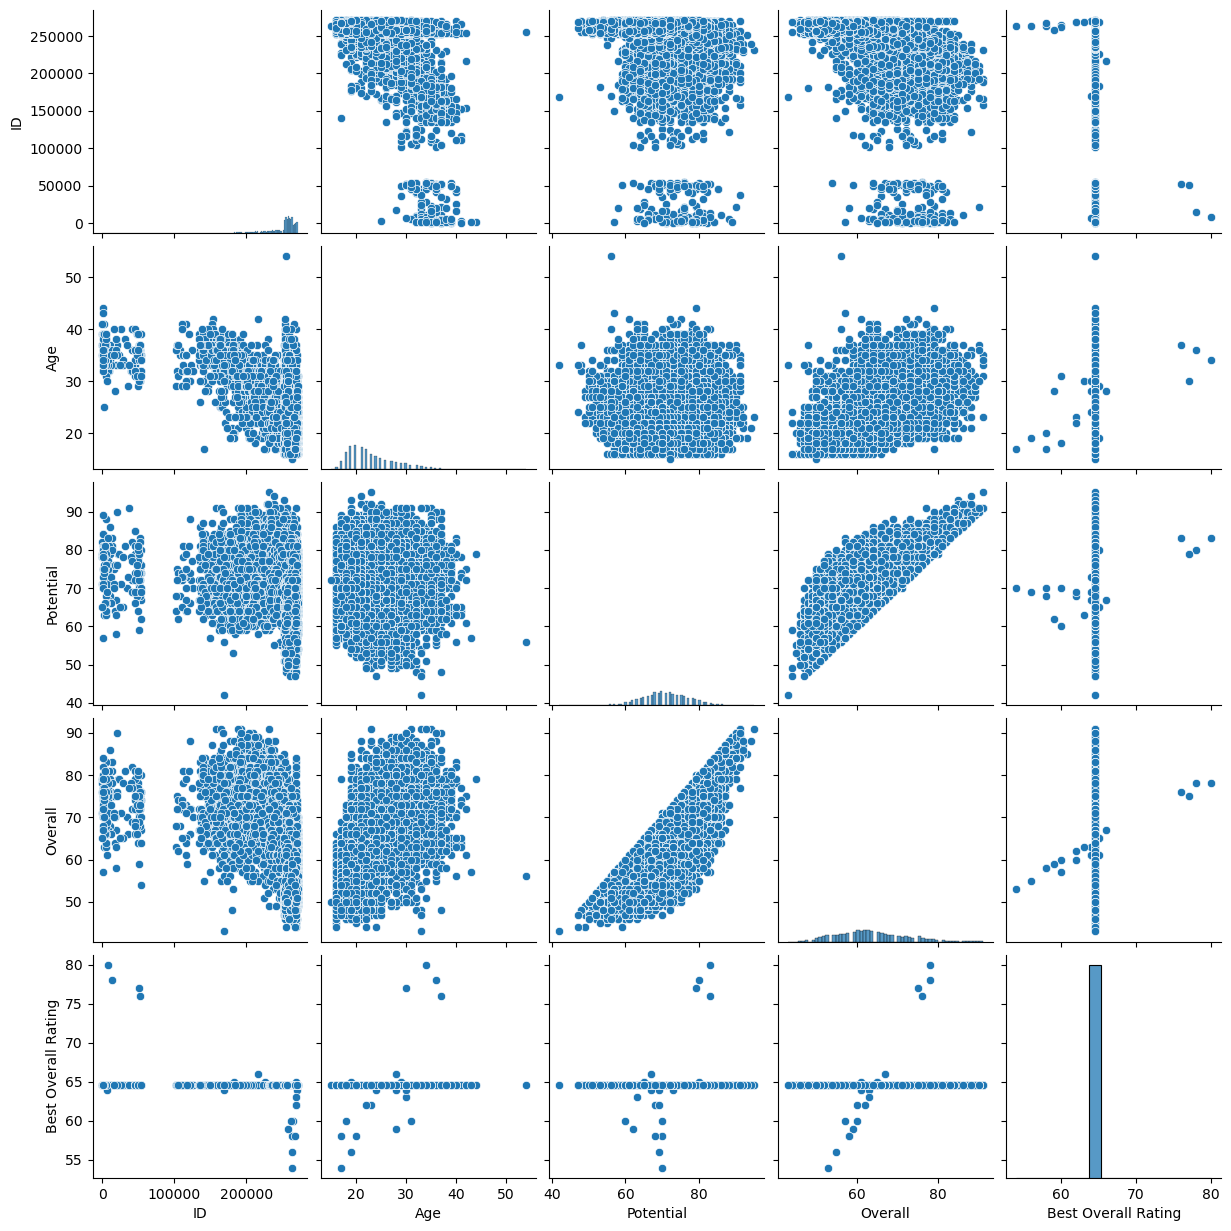

In [31]:
sns.pairplot(df)

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17660 entries, 0 to 17659
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   17660 non-null  int64  
 1   Name                 17660 non-null  object 
 2   Age                  17660 non-null  int64  
 3   Nationality          17660 non-null  object 
 4   Potential            17660 non-null  int64  
 5   Overall              17660 non-null  int64  
 6   Club                 17660 non-null  object 
 7   Real Face            17660 non-null  object 
 8   Height               17660 non-null  object 
 9   Weight               17660 non-null  object 
 10  Joined               16562 non-null  object 
 11  Best Overall Rating  17660 non-null  float64
dtypes: float64(1), int64(4), object(7)
memory usage: 1.6+ MB


In [33]:
new_data = df[["ID","Name","Age","Nationality","Potential","Overall","Club","Real Face","Height",'Weight','Best Overall Rating']]


In [34]:
new_data.head()

,ID,Name,Age,Nationality,Potential,Overall,Club,Real Face,Height,Weight,Best Overall Rating
0,209658,L. Goretzka,27,Germany,88,87,FC Bayern München,Yes,189cm,82kg,64.571429
1,212198,Bruno Fernandes,27,Portugal,87,86,Manchester United,Yes,179cm,69kg,64.571429
2,224334,M. Acuña,30,Argentina,85,85,Sevilla FC,No,172cm,69kg,64.571429
3,192985,K. De Bruyne,31,Belgium,91,91,Manchester City,Yes,181cm,70kg,64.571429
4,224232,N. Barella,25,Italy,89,86,Inter,Yes,172cm,68kg,64.571429


In [35]:
df = pd.DataFrame(new_data)

In [36]:
df.head()

,ID,Name,Age,Nationality,Potential,Overall,Club,Real Face,Height,Weight,Best Overall Rating
0,209658,L. Goretzka,27,Germany,88,87,FC Bayern München,Yes,189cm,82kg,64.571429
1,212198,Bruno Fernandes,27,Portugal,87,86,Manchester United,Yes,179cm,69kg,64.571429
2,224334,M. Acuña,30,Argentina,85,85,Sevilla FC,No,172cm,69kg,64.571429
3,192985,K. De Bruyne,31,Belgium,91,91,Manchester City,Yes,181cm,70kg,64.571429
4,224232,N. Barella,25,Italy,89,86,Inter,Yes,172cm,68kg,64.571429


# now converting the string data into the numerical data using one hot encoding apply this on Name,Nationality,Club,Real Face

In [37]:
from sklearn.preprocessing import OneHotEncoder

In [38]:
ohe = OneHotEncoder(sparse_output=False,handle_unknown='ignore')

In [39]:
categorical_cols = ['Name','Nationality','Club','Real Face']
ohe

,categories,'auto'
,drop,None
,sparse_output,False
,dtype,<class 'numpy.float64'>
,handle_unknown,'ignore'
,min_frequency,None
,max_categories,None
,feature_name_combiner,'concat'


In [40]:
encoded_data  = ohe.fit_transform(df[categorical_cols])

In [41]:
df.head()

,ID,Name,Age,Nationality,Potential,Overall,Club,Real Face,Height,Weight,Best Overall Rating
0,209658,L. Goretzka,27,Germany,88,87,FC Bayern München,Yes,189cm,82kg,64.571429
1,212198,Bruno Fernandes,27,Portugal,87,86,Manchester United,Yes,179cm,69kg,64.571429
2,224334,M. Acuña,30,Argentina,85,85,Sevilla FC,No,172cm,69kg,64.571429
3,192985,K. De Bruyne,31,Belgium,91,91,Manchester City,Yes,181cm,70kg,64.571429
4,224232,N. Barella,25,Italy,89,86,Inter,Yes,172cm,68kg,64.571429


In [42]:
encoded_data

array([[0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.]])

In [43]:
encode_cols = ohe.get_feature_names_out(categorical_cols)

In [44]:
encode_cols

array(['Name_07\xa0C. Mengi', 'Name_07\xa0F. Déhu',
       'Name_07\xa0G. Warmuz', ..., 'Club_Śląsk Wrocław', 'Real Face_No',
       'Real Face_Yes'], dtype=object)

In [45]:
encode_df = pd.DataFrame(encoded_data,columns=encode_cols)

In [46]:
final_df = pd.concat([df.drop(columns=categorical_cols),encode_df],axis=1)

In [47]:
final_df.head()

,ID,Age,Potential,Overall,Height,Weight,Best Overall Rating,Name_07 C. Mengi,Name_07 F. Déhu,Name_07 G. Warmuz,...,Club_Örebro SK,Club_Östersunds FK,Club_Ümraniyespor,Club_İstanbul Başakşehir FK,Club_İstanbulspor,Club_İttifak Holding Konyaspor,Club_ŁKS Łódź,Club_Śląsk Wrocław,Real Face_No,Real Face_Yes
0,209658,27,88,87,189cm,82kg,64.571429,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,212198,27,87,86,179cm,69kg,64.571429,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,224334,30,85,85,172cm,69kg,64.571429,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,192985,31,91,91,181cm,70kg,64.571429,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,224232,25,89,86,172cm,68kg,64.571429,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


# remove the unit i.e kg from the weight and cm from the height

In [48]:
final_df['Weight'] = final_df['Weight'].str.replace('kg', '', regex=False).str.strip().astype(float)

In [49]:
final_df['Height'] = final_df['Height'].str.replace('cm', '', regex=False).str.strip().astype(float)
final_df.head()


,ID,Age,Potential,Overall,Height,Weight,Best Overall Rating,Name_07 C. Mengi,Name_07 F. Déhu,Name_07 G. Warmuz,...,Club_Örebro SK,Club_Östersunds FK,Club_Ümraniyespor,Club_İstanbul Başakşehir FK,Club_İstanbulspor,Club_İttifak Holding Konyaspor,Club_ŁKS Łódź,Club_Śląsk Wrocław,Real Face_No,Real Face_Yes
0,209658,27,88,87,189.0,82.0,64.571429,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,212198,27,87,86,179.0,69.0,64.571429,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,224334,30,85,85,172.0,69.0,64.571429,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,192985,31,91,91,181.0,70.0,64.571429,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,224232,25,89,86,172.0,68.0,64.571429,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [50]:
final_df.shape

(17660, 18236)

In [51]:
x = df.drop(columns='Best Overall Rating')
y = df['Best Overall Rating']

In [52]:
x.shape

(17660, 10)

In [53]:
y.shape

(17660,)

In [69]:
final_df.head()

,ID,Age,Potential,Overall,Height,Weight,Best Overall Rating,Name_07 C. Mengi,Name_07 F. Déhu,Name_07 G. Warmuz,...,Club_Örebro SK,Club_Östersunds FK,Club_Ümraniyespor,Club_İstanbul Başakşehir FK,Club_İstanbulspor,Club_İttifak Holding Konyaspor,Club_ŁKS Łódź,Club_Śląsk Wrocław,Real Face_No,Real Face_Yes
0,209658,27,88,87,189.0,82.0,64.571429,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,212198,27,87,86,179.0,69.0,64.571429,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,224334,30,85,85,172.0,69.0,64.571429,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,192985,31,91,91,181.0,70.0,64.571429,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,224232,25,89,86,172.0,68.0,64.571429,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


# now impelenting the stander scaler

In [54]:
scaler = StandardScaler()

In [56]:
# final_df.head()
# Fit in chunks
import gc
n_rows = len(final_df)
batch_size = 1000  # smaller chunk for safety

# Step 1: Fit in batches
for start in range(0, n_rows, batch_size):
    end = min(start + batch_size, n_rows)
    batch = final_df.iloc[start:end].to_numpy(dtype=np.float32, copy=False)
    scaler.partial_fit(batch)
    del batch
    gc.collect()

# Step 2: Transform in batches
scaled_chunks = []
for start in range(0, n_rows, batch_size):
    end = min(start + batch_size, n_rows)
    batch = final_df.iloc[start:end].to_numpy(dtype=np.float32, copy=False)
    scaled_batch = scaler.transform(batch.astype(np.float32, copy=False))
    scaled_chunks.append(scaled_batch)
    del batch, scaled_batch
    gc.collect()

scaled_data = np.vstack(scaled_chunks).astype(np.float32)

In [63]:
# scaled_data.head()
scaled_df = pd.DataFrame(scaled_data, columns=scaled_data.columns)
# .head()

AttributeError: 'numpy.ndarray' object has no attribute 'columns'

# K-MEANS CLUSTRING

In [60]:
# step-step by :-  

# 1.select the number of Cluster
# 2.Assign the random clustring point.
# 3.Find the mean of each point to the cluster and assign the new cluster
# 4.